# BoundryExtraction And HoleFilling
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [117]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Boundry Extraction

This code defines a function called `BoundryExtraction` that takes an image as input and performs boundary extraction on the image using morphological operations.

The first line of the function defines a 3x3 kernel with a diamond-shaped structure using a numpy array. The kernel is used for both erosion and dilation operations.

The next three lines of the function use the `cv2.erode` function to perform erosion on the input image, `img`, using the defined kernel. The function then uses `cv2.dilate` to perform dilation on the input image using the same kernel. The result of these operations are stored in the `erosion` and `dilation` variables, respectively.

The next two lines of the function compute the inner and outer boundaries of the image. `beta_inner` is calculated by subtracting the `erosion` image from the original `img`, and `beta_outer` is calculated by subtracting the `img` from the `dilation` image. These operations effectively extract the boundaries of the objects in the image.

Finally, the function calculates the gradient of the image using the `dilation` and `erosion` images. The gradient is calculated as the difference between the `dilation` and `erosion` images, and is stored in the `gradient` variable.

In [119]:
def BoundryExtraction(img):
    kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
    erosion = cv2.erode(img, kernel, iterations=1)
    dilation = cv2.dilate(img, kernel, iterations=1)
    beta_inner = img - erosion
    beta_outer = dilation - img
    gradient = dilation - erosion

    plt.figure(figsize=(10, 7))
    plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(232), plt.imshow(erosion, cmap='gray'), plt.title('Erosion')
    plt.subplot(233), plt.imshow(beta_inner, cmap='gray'), plt.title('BoundryExtraction (img - erosion)')
    plt.subplot(234), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(235), plt.imshow(dilation, cmap='gray'), plt.title('Dilation')
    plt.subplot(236), plt.imshow(beta_outer, cmap='gray'), plt.title('BoundryExtraction (dilation - img)')
    plt.show()

    plt.imshow(gradient, cmap='gray'), plt.title('Gradient (dilation - erosion)')
    plt.show()

The `BoundryExtraction` function performs morphological operations to extract the boundaries of the objects in the input image and displays the results. Therefore, when called with `img1_binary` as an input, `BoundryExtraction` will perform boundary extraction on the `img1_binary` image and display the original image, the erosion and dilation images, the inner and outer boundaries, and the gradient image. 

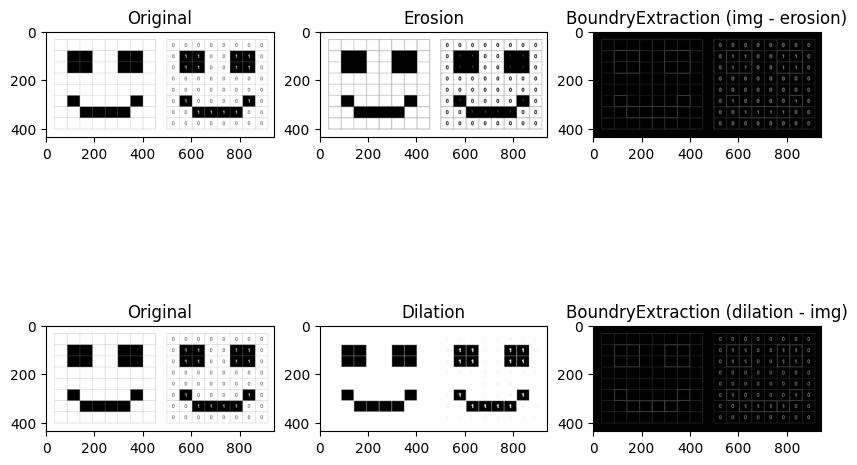

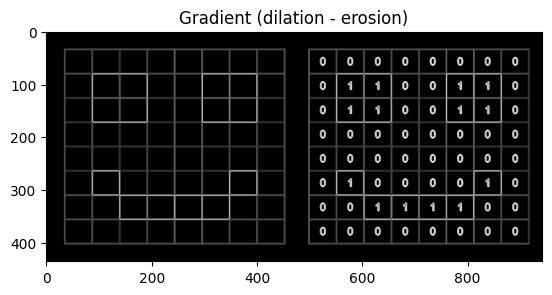

In [120]:
img1_binary = cv2.imread('Images/img1bin.png', 0)
BoundryExtraction(img1_binary)

The `BoundryExtraction` function performs morphological operations to extract the boundaries of the objects in the input image and displays the results. Therefore, when called with `img2_binary` as an input, `BoundryExtraction` will perform boundary extraction on the `img2_binary` image and display the original image, the erosion and dilation images, the inner and outer boundaries, and the gradient image. 

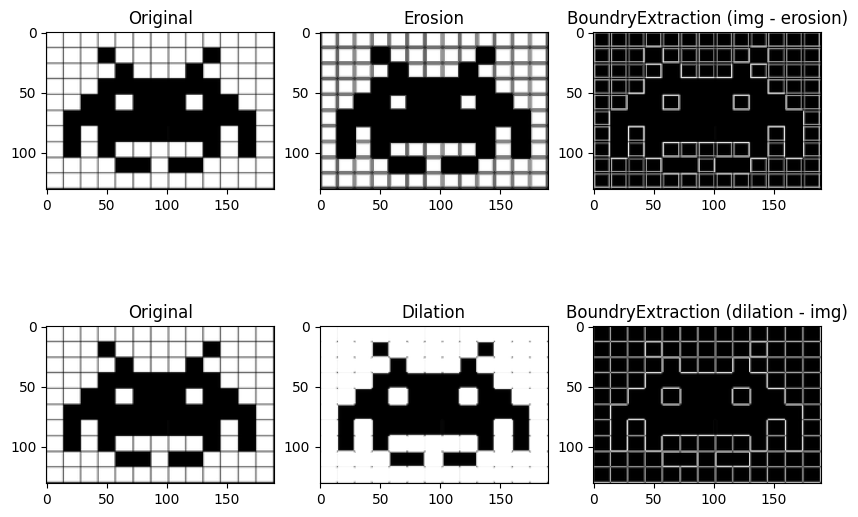

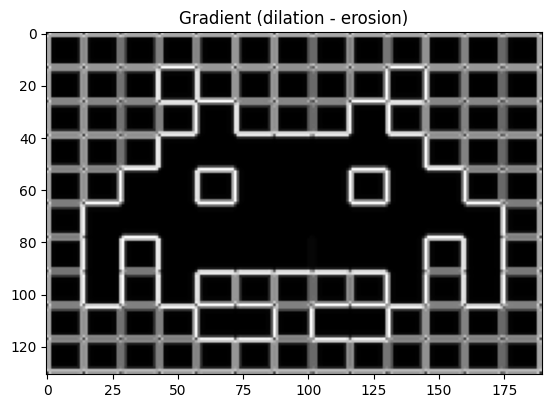

In [121]:
img2_binary = cv2.imread('Images/img2bin.png', 0)
BoundryExtraction(img2_binary)

The `BoundryExtraction` function is designed to work with binary images, and therefore the results of applying this function to a grayscale image may not be meaningful. In particular, the boundaries extracted from a grayscale image may not be as well-defined as those extracted from a binary image, as the grayscale image does not have a clear distinction between object and background pixels.

That being said, the `BoundryExtraction` function will still perform morphological operations on the `img1_gray` image as it would with a binary image. However, since `img1_gray` is a grayscale image, the results of the erosion, dilation, and boundary extraction operations may not be as visually informative as they would be with a binary image.

Overall, this code reads a grayscale image, applies `BoundryExtraction` function to it, and displays the results.

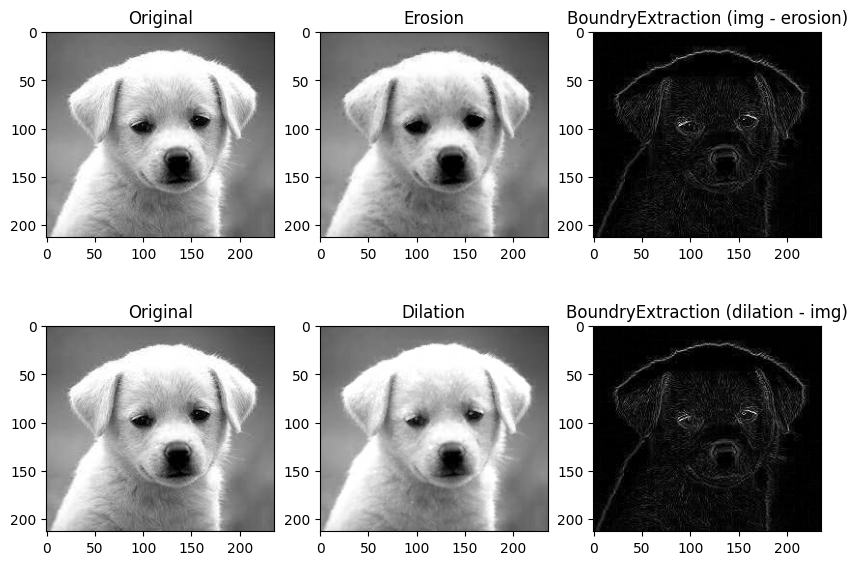

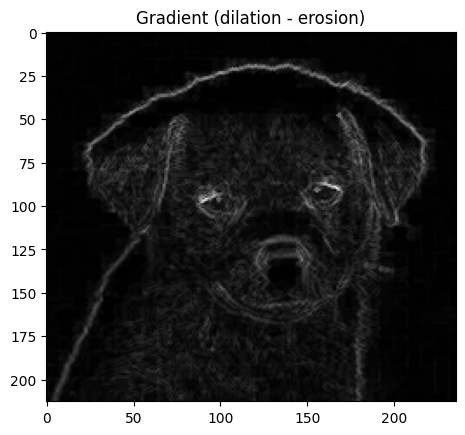

In [122]:
img1_gray = cv2.imread('Images/img1gray.jpeg', 0)
BoundryExtraction(img1_gray)

This code performs adaptive thresholding on a grayscale image called `img1_gray` using the `cv2.adaptiveThreshold` function to convert it to binary image.

The next line of the code calls the `BoundryExtraction` function with the `img1_bin` image as input. The `BoundryExtraction` function performs morphological operations to extract the boundaries of the objects in the input image and displays the results. Therefore, when called with `img1_bin` as an input, `BoundryExtraction` will perform boundary extraction on the `img1_bin` image and display the original image, the erosion and dilation images, the inner and outer boundaries, and the gradient image.

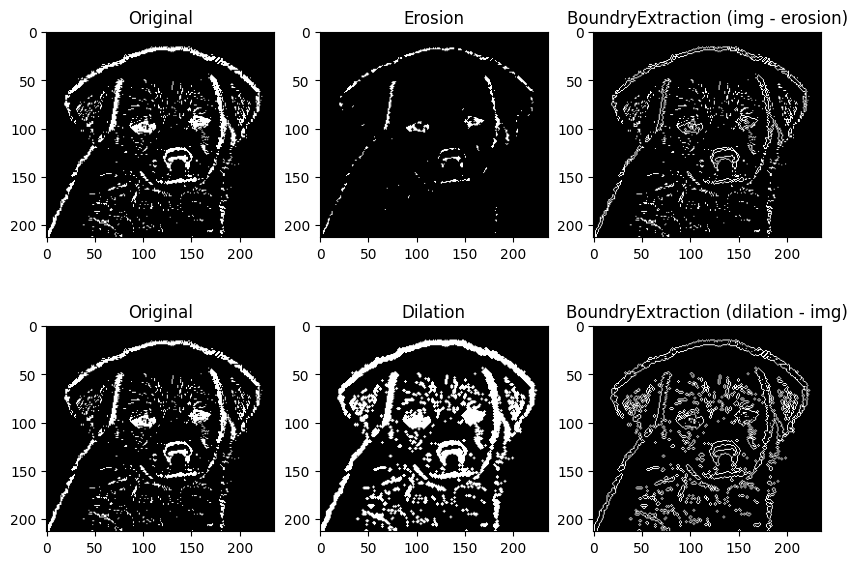

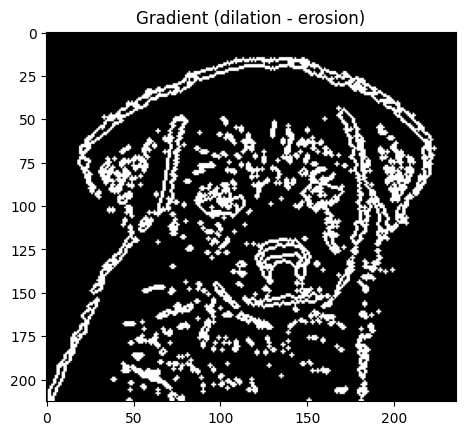

In [123]:
img1_bin = cv2.adaptiveThreshold(img1_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 15)
BoundryExtraction(img1_bin)

The `BoundryExtraction` function is designed to work with binary images, and therefore the results of applying this function to a grayscale image may not be meaningful. In particular, the boundaries extracted from a grayscale image may not be as well-defined as those extracted from a binary image, as the grayscale image does not have a clear distinction between object and background pixels.

That being said, the `BoundryExtraction` function will still perform morphological operations on the `img2_gray` image as it would with a binary image. However, since `img2_gray` is a grayscale image, the results of the erosion, dilation, and boundary extraction operations may not be as visually informative as they would be with a binary image.

Overall, this code reads a grayscale image, applies `BoundryExtraction` function to it, and displays the results.

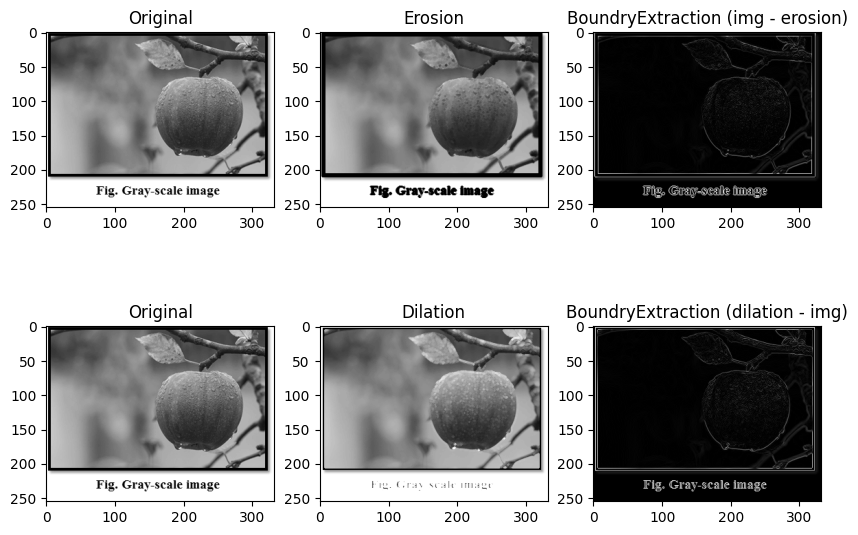

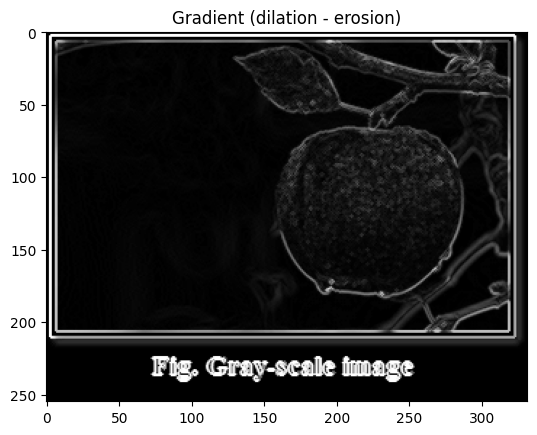

In [124]:
img2_gray = cv2.imread('Images/img2gray.png', 0)
BoundryExtraction(img2_gray)

This code performs adaptive thresholding on a grayscale image called `img2_gray` using the `cv2.adaptiveThreshold` function to convert it to binary image.

The next line of the code calls the `BoundryExtraction` function with the `img2_bin` image as input. The `BoundryExtraction` function performs morphological operations to extract the boundaries of the objects in the input image and displays the results. Therefore, when called with `img2_bin` as an input, `BoundryExtraction` will perform boundary extraction on the `img2_bin` image and display the original image, the erosion and dilation images, the inner and outer boundaries, and the gradient image.

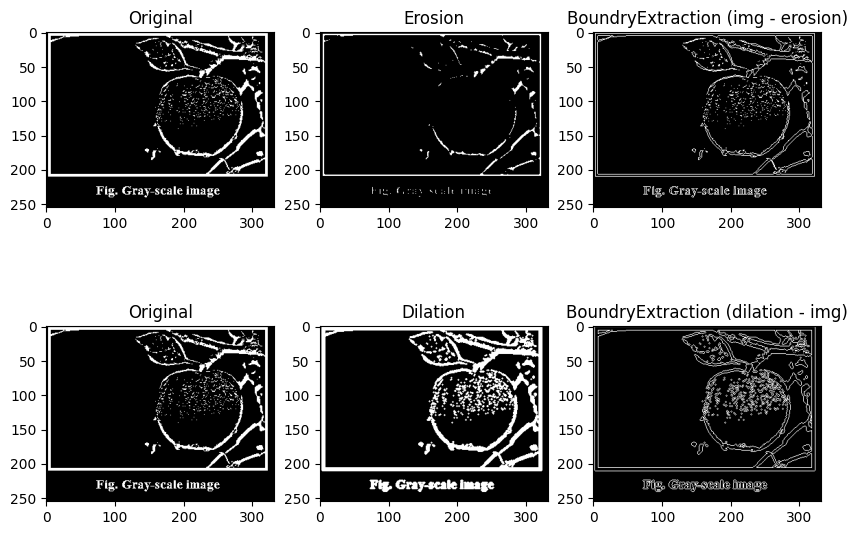

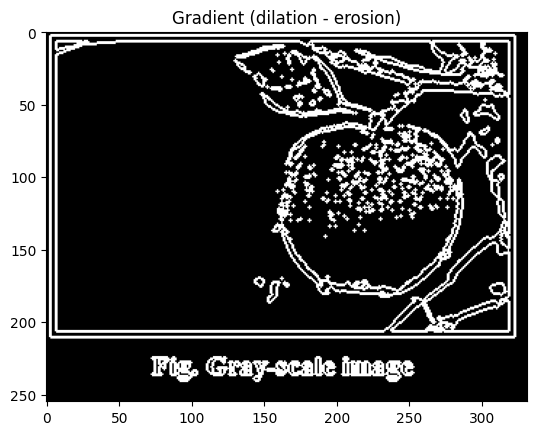

In [125]:
img2_bin = cv2.adaptiveThreshold(img2_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 15)
BoundryExtraction(img2_bin)

The `BoundryExtraction` function is designed to work with binary images, and therefore the results of applying this function to a grayscale image may not be meaningful. In particular, the boundaries extracted from a grayscale image may not be as well-defined as those extracted from a binary image, as the grayscale image does not have a clear distinction between object and background pixels.

That being said, the `BoundryExtraction` function will still perform morphological operations on the `lena` image as it would with a binary image. However, since `lena` is a grayscale image, the results of the erosion, dilation, and boundary extraction operations may not be as visually informative as they would be with a binary image.

Overall, this code reads a grayscale image, applies `BoundryExtraction` function to it, and displays the results.

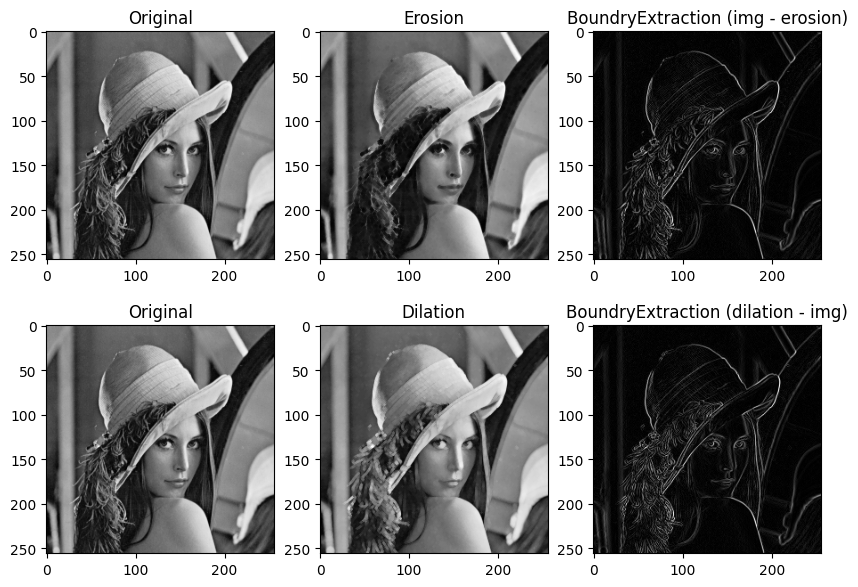

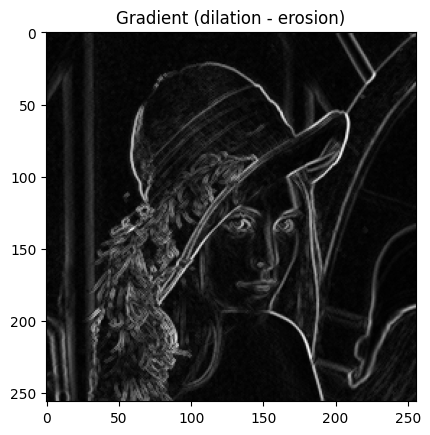

In [126]:
lena = cv2.imread('Images/lena.tif', 0)
BoundryExtraction(lena)

This code defines a function called `LOG_Filter` that takes an image as input and performs Laplacian of Gaussian (LOG) filtering to detect edges in the image.

The first line of the function applies Gaussian blur to the input image using the `cv2.GaussianBlur` function with a kernel size of (5,5) and a standard deviation of 0.

The next line of the function applies the Laplacian operator to the blurred image using the `cv2.Laplacian` function with the `cv2.CV_64F` data type, which represents a 64-bit floating-point number.

The next two lines of the function normalize the `laplacian` image to the range [0, 255] using the `cv2.normalize` function and then apply thresholding to the normalized image using the `cv2.threshold` function. The thresholding is done using the Otsu's thresholding method, which automatically calculates a threshold value based on the histogram of the image.

In [127]:
def LOG_Filter(img):
    blured_img = cv2.GaussianBlur(lena, (5, 5), 0)
    laplacian = cv2.Laplacian(blured_img, cv2.CV_64F)

    laplacian = cv2.normalize(laplacian, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    _, edges = cv2.threshold(laplacian, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    plt.imshow(edges, cmap='gray'), plt.title('Edge - LOG Filter')
    plt.show()

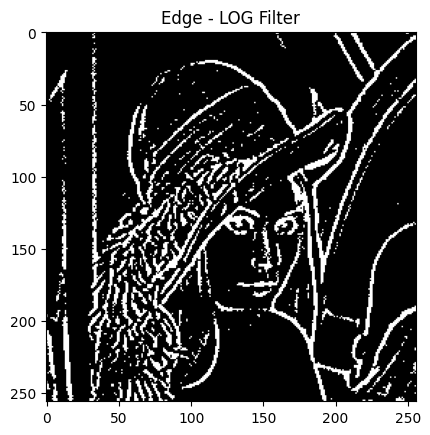

In [128]:
LOG_Filter(lena)

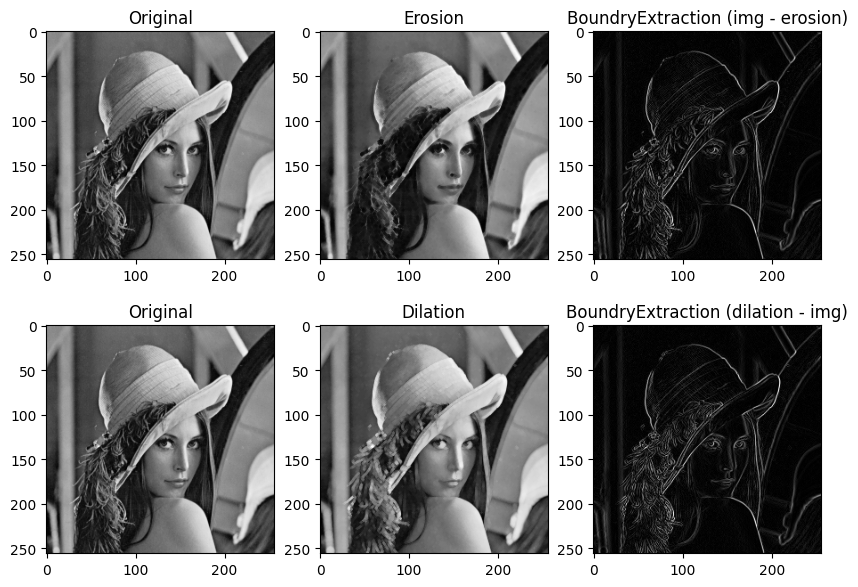

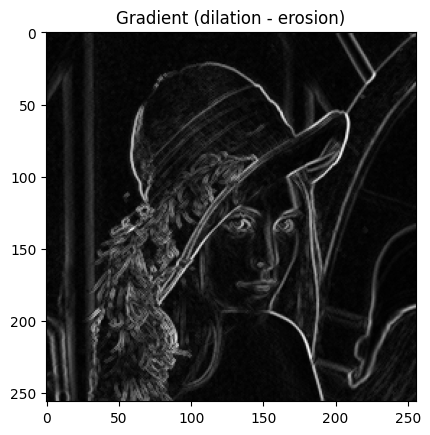

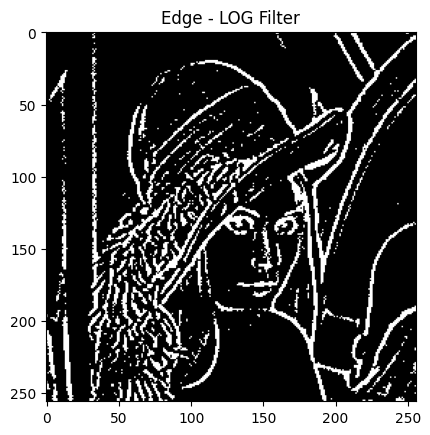

In [14]:
# Compare of BoundryExtraction and LOG_Filter
BoundryExtraction(lena)
LOG_Filter(lena)

### Hole Filling

This is a function that performs hole filling on a binary image using morphological operations. 

Here is a breakdown of the code:

1. The function takes two arguments: `img`, which is the binary input image with holes, and `kernel_size`, which is a tuple specifying the size of the structuring element used in the morphological operation.

2. The function uses the `cv2.getStructuringElement()` function from the OpenCV library to create a structuring element in the shape of an ellipse with the given `kernel_size`.

3. The function then applies the `cv2.morphologyEx()` function to the input image using the `cv2.MORPH_CLOSE` operation, which performs a dilation followed by an erosion operation using the structuring element.

4. The resulting image from the `cv2.morphologyEx()` function is the filled image with the holes in the input image closed.

5. The function returns the filled image as the output.

In [214]:
def HoleFilling(img, kernel_size=(5, 5)):
    mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    filled_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, mask)
    return filled_img

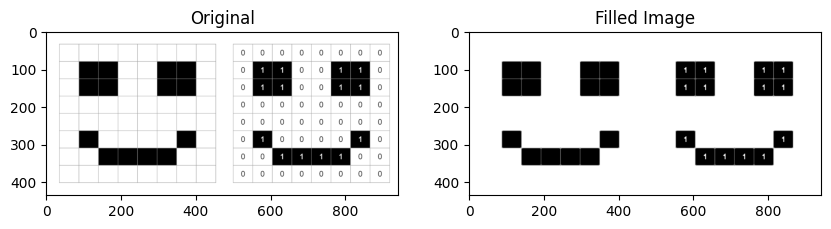

In [215]:
binary1 = cv2.imread('Images/img1bin.png', 0)
filled1 = HoleFilling(binary1)
plt.figure(figsize=(10, 7))
plt.subplot(121), plt.imshow(binary1, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(filled1, cmap='gray'), plt.title('Filled Image')
plt.show()

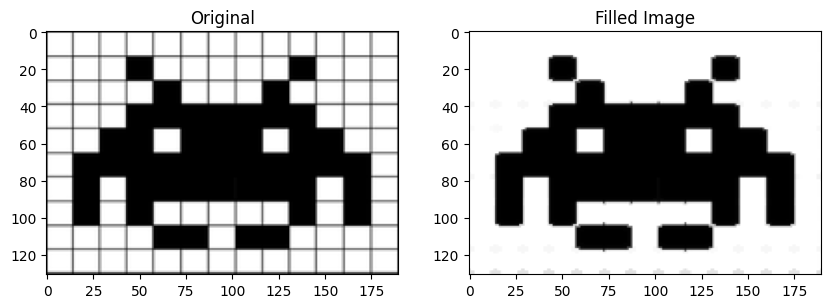

In [216]:
binary2 = cv2.imread('Images/img2bin.png', 0)
filled2 = HoleFilling(binary2)
plt.figure(figsize=(10, 7))
plt.subplot(121), plt.imshow(binary2, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(filled2, cmap='gray'), plt.title('Filled Image')
plt.show()

This is a function that performs "hole filling" on a binary image using the "closing" morphological operation. 

Here is a breakdown of the code:

1. The function takes three arguments: `img`, which is the input binary image, `iterations`, which is the number of times the morphological operation is applied, and `kernelsize`, which is an integer specifying the size of the square structuring element used for the morphological operations.

2. The first line of the function applies a threshold to the input image using `cv2.threshold()` function. Specifically, it sets all pixels with intensities greater than 128 to 255 (white) and all other pixels to 0 (black).

3. The next line uses `cv2.bitwise_not()` function to invert the binary image `img_thresh`. This operation makes the foreground (white) pixels black and the background (black) pixels white.

4. The `np.ones()` function is called to create a square structuring element with the specified `kernelsize`.

5. The `cv2.morphologyEx()` function is called with the `cv2.MORPH_CLOSE` parameter to perform a morphological closing operation on the inverted binary image `inverted_image` using the created square structuring element. This operation fills any holes or gaps in the binary image. The `iterations` parameter specifies the number of times this closing operation is performed.

6. The next line uses `cv2.bitwise_not()` to invert the filled binary image `closing`. This operation makes the filled areas white and the unfilled areas black.

7. Finally, the filled binary image is returned as the output of the function.

In [217]:
def hole_filling_with_closing(img, iterations=3, kernelsize=3):
    _, img_thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    inverted_image = cv2.bitwise_not(img_thresh)

    kernel = np.ones((kernelsize, kernelsize), np.uint8)
    closing = cv2.morphologyEx(inverted_image, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    result = cv2.bitwise_not(closing)
    return result

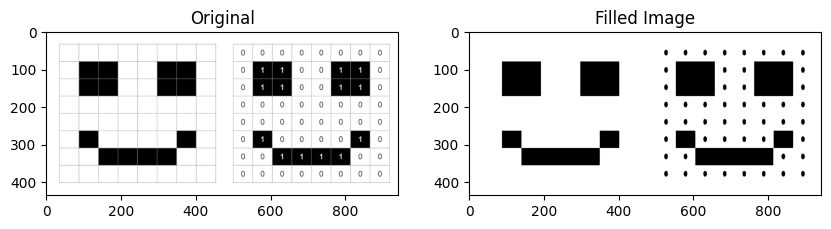

In [219]:
binary1 = cv2.imread('Images/img1bin.png', 0)
filled1 = hole_filling_with_closing(binary1)
plt.figure(figsize=(10, 7))
plt.subplot(121), plt.imshow(binary1, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(filled1, cmap='gray'), plt.title('Filled Image')
plt.show()

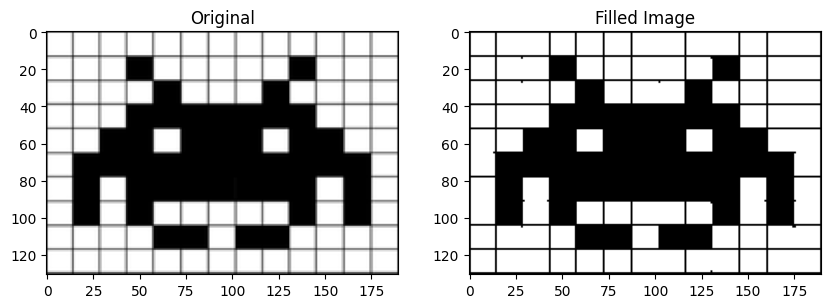

In [220]:
binary2 = cv2.imread('Images/img2bin.png', 0)
filled2 = hole_filling_with_closing(binary2)
plt.figure(figsize=(10, 7))
plt.subplot(121), plt.imshow(binary2, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(filled2, cmap='gray'), plt.title('Filled Image')
plt.show()

This is a function that performs hole filling on a binary image using the combination of two previous hole filling methods. 

Here is a breakdown of the code:

1. The function takes two arguments: `img`, which is the input binary image with holes, and `kernel_size`, which is a tuple specifying the size of the structuring element used in the morphological operation in the second method.

2. The function first applies the `hole_filling_with_closing()` function to the input image to perform a closing operation and fill the holes.

3. The function then applies the `HoleFilling()` function from the previous method to the result of the first method with the given `kernel_size` to further fill in any remaining holes.

4. The resulting image from the `HoleFilling()` function is the final filled image with all the holes in the input image closed.

5. The function returns the final filled binary image as the output.

In [221]:
# Combine of two previuos hole filling method
def hole_filling_final(img, kernel_size=(5, 5)):
    img_first = hole_filling_with_closing(img)
    img_final = HoleFilling(img_first, kernel_size=kernel_size)
    return img_final

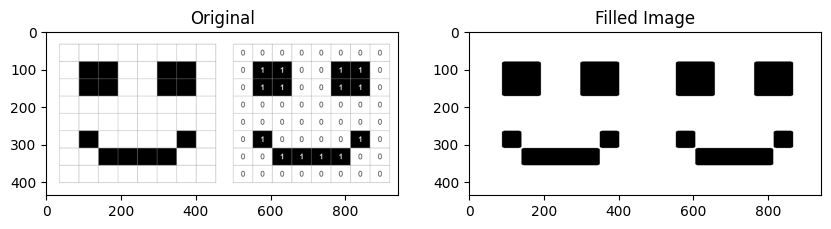

In [223]:
binary1 = cv2.imread('Images/img1bin.png', 0)
filled1 = hole_filling_final(binary1, kernel_size=(11, 11))
plt.figure(figsize=(10, 7))
plt.subplot(121), plt.imshow(binary1, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(filled1, cmap='gray'), plt.title('Filled Image')
plt.show()

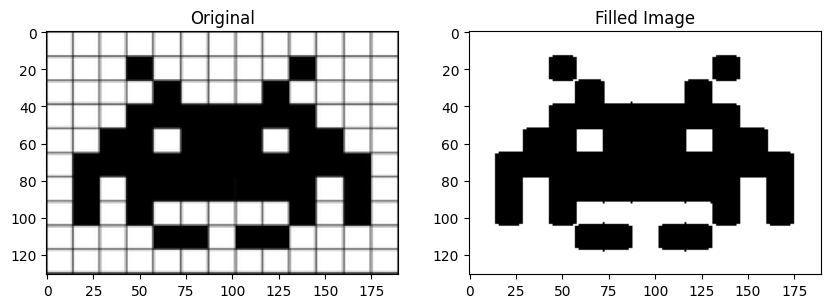

In [224]:
binary2 = cv2.imread('Images/img2bin.png', 0)
filled2 = hole_filling_final(binary2, kernel_size=(5, 5))
plt.figure(figsize=(10, 7))
plt.subplot(121), plt.imshow(binary2, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(filled2, cmap='gray'), plt.title('Filled Image')
plt.show()

In [182]:
def hole_filling_grayscale(img):
    _, mask = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    result = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Result')
    plt.show()

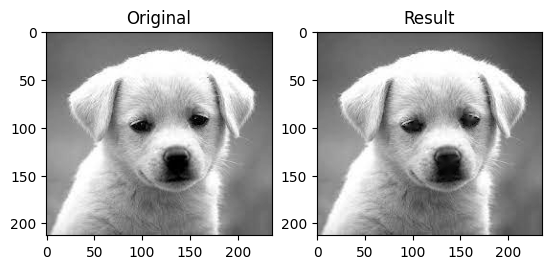

In [183]:
img1_gray = cv2.imread('Images/img1gray.jpeg', 0)
hole_filling_grayscale(img1_gray)

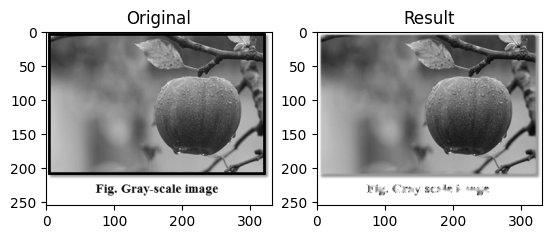

In [184]:
img2_gray = cv2.imread('Images/img2gray.png', 0)
hole_filling_grayscale(img2_gray)